In [27]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import animation
#from IPython.display import HTML

In [ ]:
####################### Useful Constants #########################
G = 6.6743e-11 #m^3kg^-1s^-2; Gravitational Constant
AU = 1.496e11 #m; Astronomical Unit in meters
dt = 24.0*60*60 #s; Seconds in a Day

####################### Defining Classes #########################
class system:
    
    '''
    Solar System Class
    '''
    
    def __init__(self,xdim=32,ydim=32,zdim=32):
        
        '''
        Initializes a Solar System. The Solar System contains Celestial Body objects and simulate
        the movement of the planets using the Planet class methods.
        
        ---Attributes---
        xdim (int): The x size of the Solar System in Astronomical Units (AU)
        ydim (int): The y size of the Solar System in AU
        Bodies (list of Celestial_Body objects): Celestial Body objects in the Solar System
        '''
        
        self.xdim = xdim*AU
        self.ydim = ydim*AU
        self.zdim = zdim*AU
        self.bodies = []
        fig = plt.figure(figsize=(10,10))
        self.ax = fig.add_subplot(projection='3d')
    
    def add_body(self,body):
        self.bodies.append(body)
        
    def draw(self):
        list_x = []
        list_y = []
        list_z = []
        for x in self.bodies:
            list_x.append(x.pos[0])
            list_y.append(x.pos[1])
            list_z.append(x.pos[2])
        self.ax.scatter(xs=list_x, ys=list_y, zs=list_z, zdir='z')
        #plt.show()
        return(list_x, list_y, list_z)  
    def motion(self, timestep):
        for x in self.bodies:
            accel_vector = np.array([0,0,0]).astype(np.float64)
            for y in self.bodies:
                if y != x:
                    ax = (6.6743e-11*(x.mass*y.mass))/(x.pos[0] + y.pos[0])**2
                    ay = (6.6743e-11*(x.mass*y.mass))/(x.pos[1] + y.pos[1])**2
                    az = (6.6743e-11*(x.mass*y.mass))/(x.pos[2] + y.pos[2])**2
                    accel_vector += np.array([ax,ay,az])
            x.vel += accel_vector*timestep
        for x in self.bodies:
            x.pos += x.vel*timestep
    def get_positions(self):
        for x in self.bodies:
            print(f'{x.name} at position {x.pos} with velocity {x.vel}')
        

In [52]:
class body:
    def __init__(self, init_v=np.array([0,0,0]), init_pos=np.array([0,0,0]), mass=5, name='default', color='blue', size=7):
        self.vel = init_v.astype(np.float64)
        self.pos = init_pos.astype(np.float64)
        self.mass = mass
        self.name = name
        self.color = color
        self.size = size

default at position [1. 2. 3.] with velocity [1.66857500e-11 4.13003391e-12 1.85397222e-12]
default at position [3.33715000e-13 1.00000000e-02 3.70794444e-14] with velocity [3.33715000e-11 8.26006782e-12 3.70794444e-12]


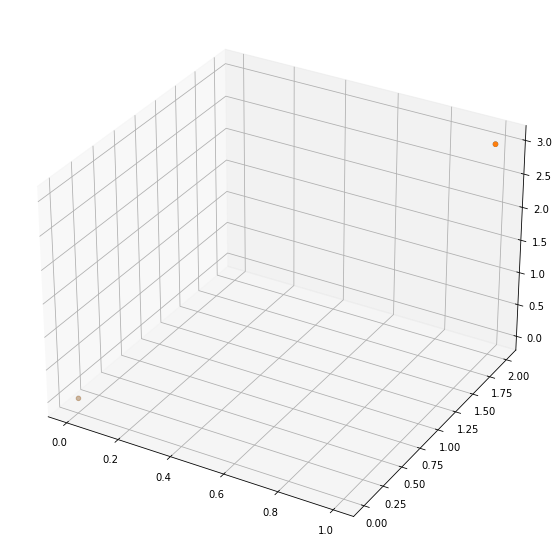

In [53]:
test_one = body(init_v = np.array([0,0,0]), init_pos=np.array([1,2,3]))
test_two = body(init_pos = np.array([0,0.01,0]))
me = system()
me.add_body(test_one)
me.add_body(test_two)
me.draw()
me.motion(timestep=0.01)
me.draw()
me.get_positions()

In [45]:
print(test_one.pos[0])

0.0
